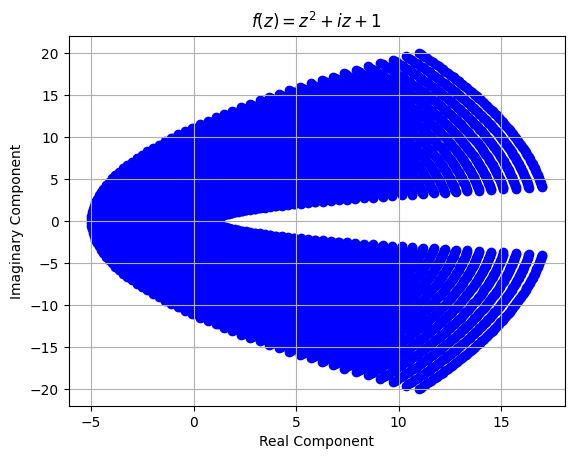

In [1]:

"""complex_lattice.ipynb"""

# Cell 1

# This cell renders a scatter plot using an equal aspect ratio of the complex function: f(z) = z^2 + iz + 1, |Re(z)| ≤ 4, 0 ≤ Im(z) ≤ 2

# Code is modified from that given by Dr. David Biersach in complex_numbers.ipynb and complex_factorization.ipynb.


# Used for type hinting
from __future__ import annotations
# Imports the typing module to aid with type hints
import typing
import numpy as np
# Provides functions for creating plots
import matplotlib.pyplot as plt
if typing.TYPE_CHECKING:
    # Allows us to use Axes as a variable type
    from matplotlib.axes import Axes
    # Allows us to use arrays
    from numpy.typing import NDArray

# Define f(z) = z^2 + iz + 1
def f(z: complex) -> complex:
    return z**2 + 1j*z + 1

def conversion()-> tuple [tuple [X: NDArray [np.int_], Y: NDArray [np.int_]], tuple [real_z: NDArray[np.float_], imag_z: NDArray [np.float_]] ]:
    # real swings between -4 to 4
    real_z: NDArray[np.float_] = np.linspace(-4, 4, 100)
    # imaginary component should be between 0 and 2
    imag_z: NDArray[np.float_] = np.linspace(0, 2, 100)
    # Generate complex numbers from the real and imaginary components
    Z: NDArray [np.complex128] = np.array([complex(real, imag) for real in real_z for imag in imag_z])

    # Apply the function f(z) to all complex numbers in Z
    f_combined_values: NDArray [np.complex128] = np.array([f(z) for z in Z])

    # Convert f_combined_values into real component using magnitude (nd array of x values) and
    # imaginary component (f values - magnitude) nd array of y values
    X: NDArray [np.int_] = np.array([z.real for z in f_combined_values])
    Y: NDArray [np.int_]= np.array([z.imag for z in f_combined_values])
    real_imag_f: tuple = [X, Y]
    real_imag_init: tuple = (real_z, imag_z)
    return [real_imag_f, real_imag_init]

def plot(ax: Axes, zoom: bool) -> None:
    # Define the real and imaginary domains for z (make sure both arrays are the same length)
    real_imag_f, _= conversion()
    ax.scatter(real_imag_f[0], real_imag_f[1], color="blue")
    ax.set_title(r"$f(z) = z^2 + iz + 1$")
    ax.set_xlabel("Real Component")
    ax.set_ylabel("Imaginary Component")
    ax.grid()
    

    if zoom:
        ax.set_xlim(-4, 4)
        ax.set_ylim(0, 2)

def plot_f(zoom: bool = False) -> None:
    # create a figure window
    plt.close("all")
    plt.figure()
    plot(plt.axes(),zoom)
    plt.show()
    


# Call the plot_f function to generate the scatter plot
plot_f()


In [2]:
# This cell should calculate and
# display how many Gaussian Integers 𝑧 are there such that 𝐼𝑚(𝑧)>0 and |𝑅𝑒(𝑓(𝑧))|≤10 and |𝐼𝑚(𝑓(𝑧))|≤10

# Code is aided by: 
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html 
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html.

def count_gaussian_integers() -> None:
    """Create a np.meshgrid of integer dots based on the Re(z) and Im(z) bounds, 
    and see how many of those dots fall within this region: |Re((f(z))| <= 10, |Im(f(z))|<= 10"""

    # Initialize the bounds
    # |Re(z)| <= 10, |Im(z)|<= 10
    min_real:int = -10
    max_real:int = 10
    min_imag: int= -10 
    max_imag: int= 10
    # Create a grid of integer dots within these bounds for the real and imaginary components
    real_dots, imag_dots= np.meshgrid (np.arange (min_real, max_real+1), np.arange (min_imag, max_imag+1))
    # Transform the real and imaginary integer dots back into 1D arrays using ravel
    real_dots: NDArray [np.int_]= real_dots.ravel()
    imag_dots: NDArray [np.int_]= imag_dots.ravel()
    # Count how many of these dots, when plugged into our f(x) function, fall into this grid. 
    # Initialize count to 0 
    count: int = 0 
    # Use zip to pair up the values of real_dots and imag_dots into a list of complex integers
    # for each complex and imaginary component 
    for real_dots, imag_dots in zip(real_dots, imag_dots):
        # Define the value we will plug into f(z)
        z: complex= complex (real_dots, imag_dots)
        # Call our helper function in cell 1
        f_z: complex = f(z)
        # Check if it falls within these bounds |Re((f(z))| <= 10, |Im(f(z))|<= 10
        if abs (f_z.real)<=10 and abs(f_z.imag)<=10: 
            count +=1
    # print the number of gaussian integers 
    print(f"Number of Gaussian Integers:{count}")
    
count_gaussian_integers()





Number of Gaussian Integers:42
